## The dataset
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

In [40]:
## For data handling
import pandas as pd
import numpy as np

## For Image processing
from scipy import ndimage
import imageio as iio
 
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns


## Miscellaneous tools
import os
from pathlib import Path
import glob

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [48]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = trainpath / 'NORMAL'
pneumonia_cases_dir = trainpath / 'PNEUMONIA'

normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

In [47]:
len(list(pneumonia_cases))

3875

## Some details about the data

In [49]:
print("Train set:")
print("-"*60)
print(f"PNEUMONIA={len(os.listdir(Path(trainpath / 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(Path(trainpath / 'NORMAL')))}")

print("\nTest set:")
print('-'*60)
print(f"PNEUMONIA={len(os.listdir(Path(testpath / 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(Path(testpath / 'NORMAL')))}")

print("\nValidation set")
print('-'*60)
print(f"PNEUMONIA={len(os.listdir(Path(valpath / 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(Path(valpath / 'NORMAL')))}")

Train set:
------------------------------------------------------------
PNEUMONIA=3876
NORMAL=1342

Test set:
------------------------------------------------------------
PNEUMONIA=390
NORMAL=234

Validation set
------------------------------------------------------------
PNEUMONIA=9
NORMAL=9


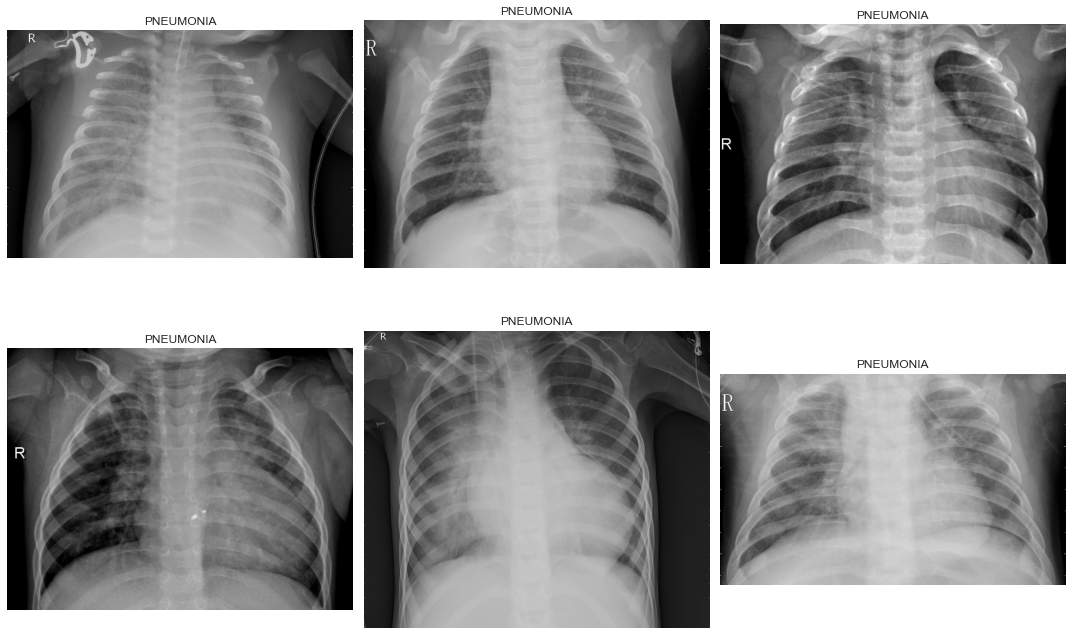

In [41]:
plt.figure(figsize=(15, 10))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.title("PNEUMONIA")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.tight_layout()

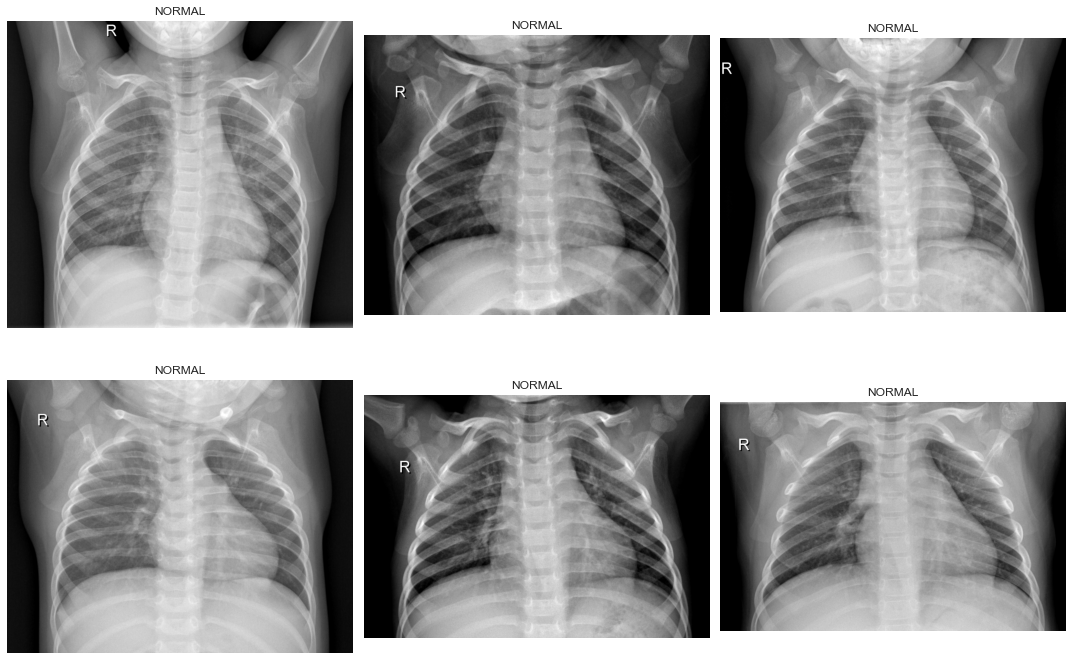

In [42]:
plt.figure(figsize=(15, 10))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.title("NORMAL")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.tight_layout()

In [26]:
normal_var = []
for i in range(1000):
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    normal_var.append(ndimage.variance(img))

In [27]:
pneumonia_var = []
for i in range(1000):
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    pneumonia_var.append(ndimage.variance(img))

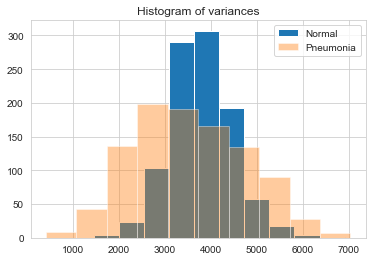

In [29]:
plt.title("Histogram of variances")
plt.hist(normal_var,label="Normal")
plt.hist(pneumonia_var,alpha=0.4,label="Pneumonia")
plt.legend()